## Import Packages

In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
# from sklearn.ensemble import AdaBoostClassifier


# Import data

In [23]:
data = pd.read_csv('founder_V0.3_founder.csv')
data = data.dropna()

In [24]:
# Replace detailed role variable with binary variable which represents if the person is founder or not 
data['Primary Job Title'] = data['Founder']

In [25]:
# Drop variables not to be used in our models
data = data.drop(['Full Name','Bio','Founder'], axis=1)

In [26]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1


In [27]:
# Convert gender variable (0 or 1 or 2) to integers
data['Gender'] = data['Gender'].astype(int)

In [107]:
# data.shape

In [28]:
# Drop those rows that have 2 as Gender variable (these are the ones who do not wish to identify their genders)
data=data[(data.Gender==2) == False]

In [109]:
# data.shape

In [29]:
# Changing the strings in the Headquarters Location column with their frequencies over the all dataset.
df1 = data['Headquarters Location '].value_counts().reset_index(name='count').rename(columns={'index': 'Headquarters Location '})

In [30]:
data = pd.merge(data,df1,on=['Headquarters Location '], how='left' )

In [31]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,count
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1,6535
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1,6535
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1935


In [32]:
data['Headquarters Location '] = data['count']

In [33]:
# Drop the frequencies column and two other columns that will not be used in the model.

data = data.drop(['count'], axis=1)

data = data.drop(['Categories','Closed Date'], axis=1)

In [34]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Headquarters Location,Operating Status,Founded Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,6535,1,2003,1,4,1
1,1,1,100,2,1,1,0,0,0,1,6535,1,2003,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,6535,1,2004,1,5,1
3,1,1,128,1,6,7,0,0,1,5,6535,1,2006,1,2,1
4,1,1,861,1,0,0,0,0,0,0,1935,1,2013,0,3,1


## Normalization

We divide every numerical variable by the maximum value it may take to nomalize them between 0 and 1

In [35]:
data['Number of News Articles'] = data['Number of News Articles']/data['Number of News Articles'].max()

In [36]:
data['Number of Founded Organizations'] = data['Number of Founded Organizations']/data['Number of Founded Organizations'].max()

In [37]:
data['Number of Portfolio Companies'] = data['Number of Portfolio Companies']/data['Number of Portfolio Companies'].max()

In [38]:
data['Number of Investments_x'] = data['Number of Investments_x']/data['Number of Investments_x'].max()

In [39]:
data['Number of Partner Investments'] = data['Number of Partner Investments']/data['Number of Partner Investments'].max()

In [40]:
data['Number of Lead Investments_x'] = data['Number of Lead Investments_x']/data['Number of Lead Investments_x'].max()

In [41]:
data['Number of Exits_x'] = data['Number of Exits_x']/data['Number of Exits_x'].max()

In [42]:
data['Number of Events_x'] = data['Number of Events_x']/data['Number of Events_x'].max()

In [43]:
data['Number of Founders'] = data['Number of Founders']/data['Number of Founders'].max()

In [44]:
data['Headquarters Location '] = data['Headquarters Location ']/data['Headquarters Location '].max()

In [45]:
data.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Headquarters Location,Operating Status,Founded Date,Company Type,Number of Founders,Success
0,0,1,0.734069,0.538462,0.112245,0.187500,0.0,1.0,0.162162,0.074074,1.000000,1,2003,1,0.363636,1
1,1,1,0.005082,0.153846,0.010204,0.008929,0.0,0.0,0.000000,0.037037,1.000000,1,2003,1,0.363636,1
2,1,1,1.000000,0.769231,0.061224,0.062500,0.0,0.0,0.000000,0.185185,1.000000,1,2004,1,0.454545,1
3,1,1,0.006505,0.076923,0.061224,0.062500,0.0,0.0,0.027027,0.185185,1.000000,1,2006,1,0.181818,1
4,1,1,0.043754,0.076923,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.296098,1,2013,0,0.272727,1


In [46]:
#Split the data to training and test datasets 

from sklearn.model_selection import train_test_split

X_data2 = data.iloc[:,:-1] 
Y_data2 = data['Success'] 
    
print("Feature vector shape=", X_data2.shape)
print("Class shape=", Y_data2.shape)

Feature vector shape= (18230, 15)
Class shape= (18230,)


In [47]:
X_data2.head()

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Headquarters Location,Operating Status,Founded Date,Company Type,Number of Founders
0,0,1,0.734069,0.538462,0.112245,0.187500,0.0,1.0,0.162162,0.074074,1.000000,1,2003,1,0.363636
1,1,1,0.005082,0.153846,0.010204,0.008929,0.0,0.0,0.000000,0.037037,1.000000,1,2003,1,0.363636
2,1,1,1.000000,0.769231,0.061224,0.062500,0.0,0.0,0.000000,0.185185,1.000000,1,2004,1,0.454545
3,1,1,0.006505,0.076923,0.061224,0.062500,0.0,0.0,0.027027,0.185185,1.000000,1,2006,1,0.181818
4,1,1,0.043754,0.076923,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.296098,1,2013,0,0.272727


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_data2, Y_data2 , random_state=100)

## Models

### Logistic Regression

In [58]:
logreg = LogisticRegression()
classifier = logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
predictions = classifier.predict_proba(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  60.71
Test accuracy:  61.74


### Support Vector Machines

In [51]:

svc = SVC(kernel = 'rbf',probability = True)
svc.fit(x_train, y_train) #takes the training set (attributes and labels) and fit the model based on that
y_pred_svm = svc.predict(x_test)#Takes the test set(attribute)to predict labels
#print("Predicted probabilitie for samples success or failure:\n\n{}".format(svc.predict_proba(x_test[:20])))
data=svc.predict_proba(x_test)
acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)#Calculate mean accuracy
print("Train accuracy: ",acc_svc_train)
acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  74.36
Test accuracy:  74.9


### Random Forest

In [52]:
random_forest = RandomForestClassifier(n_estimators=1000)
classifier = random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
predictions = classifier.predict_proba(x_test)


In [36]:
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

data = pd.DataFrame(predictions, columns=["Failure", "Success"])
data['predicted_result'] = random_forest.predict(x_test)
data.head()

Train accuracy:  94.16
Test accuracy:  77.14


,Failure,Success,predicted_result
0,0.764280,0.235720,0
1,0.999909,0.000091,0
2,0.110702,0.889298,1
3,0.669817,0.330183,0
4,1.000000,0.000000,0


![Confusion Matrix](https://jshilpa.com/python/true%20positive.png)

Possible Classification Outcomes:
-  TN True Negative
-  TP True Positive
-  FN False Nagative
-  FP False Positive

Accuracy = TN + TN/ TN + TP + FN + FP

### Accuracy, Recall and Precision



In [53]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test, y_pred_rnf) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred_rnf))
print ('Report : ')
print (classification_report(y_test, y_pred_rnf))

Confusion Matrix :
[[2285  490]
 [ 553 1230]]
Accuracy Score : 0.7711715664765247
Report : 
             precision    recall  f1-score   support

          0       0.81      0.82      0.81      2775
          1       0.72      0.69      0.70      1783

avg / total       0.77      0.77      0.77      4558



### ROC and Area Under The Curve(AUC)
![ROC](https://jshilpa.com/python/ROC1.png)

[Tool Used](http://www.navan.name/roc/)

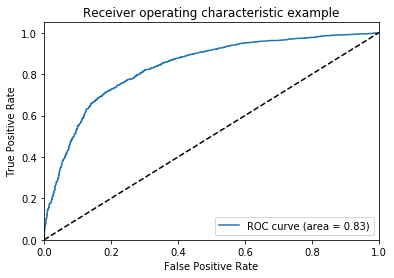

In [60]:
# Define Roc curve

# Binarize the output
y_test = label_binarize(y_test, classes=[1,0])
y_train = label_binarize(y_train, classes=[1,0])

n_classes = y_train.shape[1]

# Learn to predict each class against the other
ovr = OneVsRestClassifier(random_forest)

y_score = ovr.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(tpr[i], fpr[i])
    
# Plot  ROC curve

for i in range(n_classes):
    plt.figure()
    plt.plot(tpr[i], fpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

                                 Importance
Number of Lead Investments_x       0.001234
Number of Partner Investments      0.003791
Number of Exits_x                  0.005055
Operating Status                   0.005969
Number of Portfolio Companies      0.012244
Gender                             0.012428
Number of Investments_x            0.012690
Primary Job Title                  0.013953
Company Type                       0.017325
Number of Founded Organizations    0.038815
Number of Events_x                 0.042167
Number of Founders                 0.091320
Number of News Articles            0.178704
Headquarters Location              0.223595
Founded Date                       0.340711


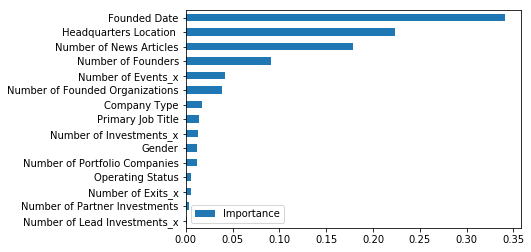

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model_var_imp( model , X , y ):
   
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    print(imp)
    imp[ : 15 ].plot( kind = 'barh' )
    #print (round(model.score( X , y ) * 100,2))

plot_model_var_imp(random_forest, x_train, y_train)